In [7]:
from qiskit import QuantumCircuit, Aer, IBMQ, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex

import numpy as np
%matplotlib inline

# Load IBM account
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-11-02 13:02:54,227: Credentials are already in use. The existing account in the session will be replaced.


## Puertas cuánticas de 1 qubit

Se ilustra el comportamiento teórico de las puertas de Pauli X, Y y Z, cuyas matrices se definen como

$$X=\begin{pmatrix} 0 & 1\\ 1 & 0 \end{pmatrix}, \quad Y=\begin{pmatrix} 0 & -i\\ i & 0 \end{pmatrix}, \quad Z=\begin{pmatrix} 1 & 0\\ 0 & -1 \end{pmatrix}.$$

Se crea un circuito de medida con 1 qubit y 1 bit para hacer corresponder los qubits a los bits clásicos 0 y 1. Se añade esta medida a los circuitos creados para cada puerta de Pauli inicializadas en el qubit 0.

In [ ]:
# Let's do a measurement circuit with 1 qubit and 1 bit
qc_m = QuantumCircuit(1, 1)
qc_m.measure([0], [0])

/tmp/ipykernel_243/618180347.py:9: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qcX_m = qcX + qc_m
/opt/conda/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:933: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


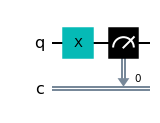

In [2]:
# Let's do an X-gate on a |0> qubit
qcX = QuantumCircuit(1)
qcX.x(0)

qcX_m = qcX + qc_m
qcX_m.draw('mpl')

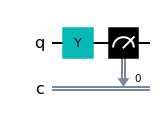

In [3]:
# Let's do an Y-gate on a |0> qubit
qcY = QuantumCircuit(1)
qcY.y(0)

qcY_m = qcY + qc_m
qcY_m.draw('mpl')

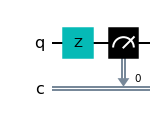

In [4]:
# Let's do an Z-gate on a |0> qubit
qcZ = QuantumCircuit(1)
qcZ.z(0)

qcZ_m = qcZ + qc_m
qcZ_m.draw('mpl')

In [13]:
# Let's use Aer's qasm_simulator
qasm_simulator = Aer.get_backend('qasm_simulator')

# Execute the circuits X,Y and Z on the simulator
job_X = execute(qcX_m, qasm_simulator, shots=1024)
job_Y = execute(qcY_m, qasm_simulator, shots=1024)
job_Z = execute(qcZ_m, qasm_simulator, shots=1024)

# Grab the results from the job
result_X = job_X.result()
result_Y = job_Y.result()
result_Z = job_Z.result()

# Counts the results
counts_X = result_X.get_counts(qcX_m)
counts_Y = result_Y.get_counts(qcY_m)
counts_Z = result_Z.get_counts(qcZ_m)

Las salidas correspondientes para cada puerta de Pauli deben ser:

$$X|0\rangle=\begin{pmatrix} 0 & 1\\ 1 & 0 \end{pmatrix}\begin{pmatrix} 1\\ 0\end{pmatrix} = \begin{pmatrix}0\\ 1\end{pmatrix}=|1\rangle.$$

$$Y|0\rangle=\begin{pmatrix} 0 & -i\\ i & 0 \end{pmatrix}\begin{pmatrix} 1\\ 0\end{pmatrix} = \begin{pmatrix}0\\ i\end{pmatrix}=i|1\rangle.$$

$$Z|0\rangle=\begin{pmatrix} 1 & 0\\ 0 & -1 \end{pmatrix}\begin{pmatrix} 1\\ 0\end{pmatrix} = \begin{pmatrix}1\\ 0\end{pmatrix}=|1\rangle.$$

Es decir, se obtendrá el qubit $|1\rangle$ en las puertas X, Y y Z con probabilidad $|1|^2=1$, $|i|^2=1$ y $|1|^2=1$ respectivamente. 

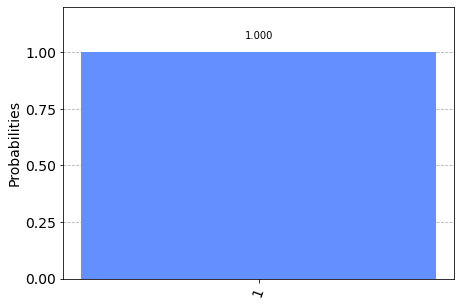

In [9]:
plot_histogram(counts_X)

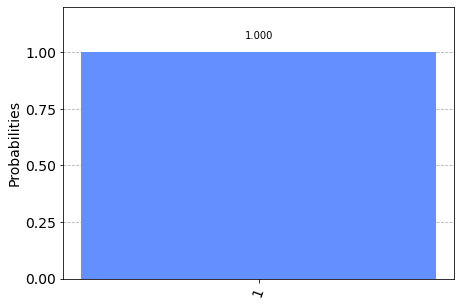

In [11]:
plot_histogram(counts_Y)

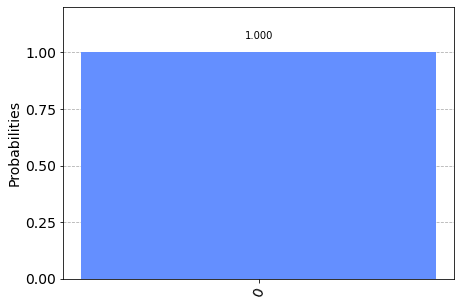

In [12]:
plot_histogram(counts_Z)

## Puertas cuánticas de 2 qubits